In [4]:
import keras # importing keras
from keras.datasets import imdb # imbd is the dataset for sentiment classification
from keras.preprocessing.sequence import pad_sequences # padding sequence
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Embedding, SpatialDropout1D
from keras.layers import SimpleRNN 
from keras.callbacks import ModelCheckpoint
import os
from sklearn.metrics import roc_auc_score # roc_auc_score 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

In [5]:
# training:
epochs = 16 # way more!
batch_size = 128

# vector-space embedding: 
n_dim = 64 
n_unique_words = 10000 
max_review_length = 100 # lowered due to vanishing gradient over time
pad_type = trunc_type = 'pre'
drop_embed = 0.2 

# RNN layer architecture:
n_rnn = 256 
drop_rnn = 0.2

In [6]:
(x_train, y_train), (x_valid, y_valid) = imdb.load_data(num_words=n_unique_words) # removed n_words_to_skip

In [7]:
x_train = pad_sequences(x_train, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)
x_valid = pad_sequences(x_valid, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)

In [8]:
model = Sequential()
model.add(Embedding(n_unique_words, n_dim, input_length=max_review_length)) 
model.add(SpatialDropout1D(drop_embed))
model.add(SimpleRNN(n_rnn, dropout=drop_rnn))
# model.add(Dense(n_dense, activation='relu')) # typically don't see top dense layer in NLP like in 
# model.add(Dropout(dropout))
model.add(Dense(1, activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 64)           640000    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 100, 64)           0         
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 256)               82176     
_________________________________________________________________
dense (Dense)                (None, 1)                 257       
Total params: 722,433
Trainable params: 722,433
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
modelcheckpoint = ModelCheckpoint(filepath="/weights.{epoch:02d}.hdf5")

In [13]:

# 80.6% validation accuracy in epoch 4
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_valid, y_valid), callbacks=[modelcheckpoint])

Epoch 1/16
196/196 [==============================] - 93s 346ms/step - loss: 0.6951 - accuracy: 0.5100 - val_loss: 0.6507 - val_accuracy: 0.5951
Epoch 2/16
196/196 [==============================] - 67s 340ms/step - loss: 0.6077 - accuracy: 0.6660 - val_loss: 0.6189 - val_accuracy: 0.6496
Epoch 3/16
196/196 [==============================] - 69s 351ms/step - loss: 0.5227 - accuracy: 0.7408 - val_loss: 0.5158 - val_accuracy: 0.7816
Epoch 4/16
196/196 [==============================] - 67s 343ms/step - loss: 0.5386 - accuracy: 0.7376 - val_loss: 0.4114 - val_accuracy: 0.8152
Epoch 5/16
196/196 [==============================] - 67s 342ms/step - loss: 0.3648 - accuracy: 0.8448 - val_loss: 0.4231 - val_accuracy: 0.8200
Epoch 6/16
196/196 [==============================] - 66s 339ms/step - loss: 0.4752 - accuracy: 0.7629 - val_loss: 0.6289 - val_accuracy: 0.6308
Epoch 7/16
196/196 [==============================] - 67s 342ms/step - loss: 0.5219 - accuracy: 0.7463 - val_loss: 0.9768 - val_ac

In [15]:
model.load_weights("/weights.16.hdf5")

In [16]:
y_hat = model.predict_proba(x_valid)

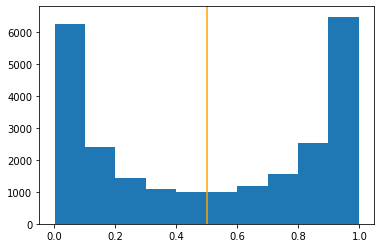

In [17]:
plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')

In [18]:
"{:0.2f}".format(roc_auc_score(y_valid, y_hat)*100.0)

'79.26'